In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import numpy as np
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Dataset Description

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.


# Read the CSV file from into a Pandas DataFrame
"Class" column is the Y variable where mushrooms are classified as poinsonous or edible based on various features and parts of the anatomy of a mushroom. 
"p" stands for poisonous, and "e" stands for edible.
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [2]:
data = Path('mushrooms.csv')
df = pd.read_csv(data)
df.shape

(8124, 23)

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Step 2: Encode the data of the dataset.

Step 3: Create the labels set (y) from the “class” column, and then create the features (X) DataFrame from the remaining columns.

In [4]:
# Separate the y variable, the labels
y = df['class']

# Separate the X variable, the features
X = df.drop(columns="class")

# Question is: "Is it poisonous?" 
encoding with LabelEncoder will code "p" for poisonous as the positive, "1"


In [5]:
from sklearn.preprocessing import LabelEncoder
label_model = LabelEncoder()
y_encoded = label_model.fit_transform(y)
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
# Review the y variable Series
y_encoded[:5]

array([1, 0, 0, 1, 0])

In [7]:
# Review the X variable DataFrame
X[:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [8]:
X.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
mushroom_X = pd.get_dummies(X,dtype=float)
mushroom_X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
values , counts = np.unique(y_encoded, return_counts=True)
np.asarray((values, counts)).T

array([[   0, 4208],
       [   1, 3916]], dtype=int64)

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(mushroom_X,y_encoded, random_state=78)

In [12]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [14]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [15]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [16]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1048,0
Actual 1,0,983


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Feature Importance

In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.02793597457118894, 'population'),
 (0.023960464597025916, 'habitat'),
 (0.0051558461864248655, 'gill-spacing'),
 (0.004206001825035968, 'gill-color'),
 (0.0034602637201942717, 'spore-print-color'),
 (0.002510717388409302, 'stalk-root'),
 (0.0021681565323827053, 'cap-shape'),
 (0.001946485292392525, 'ring-type'),
 (0.0014760507202276933, 'stalk-shape'),
 (0.0014105395797636752, 'veil-type'),
 (0.0011693901476819402, 'stalk-color-above-ring'),
 (0.0010742260584794688, 'gill-attachment'),
 (0.0010684608225227895, 'stalk-color-below-ring'),
 (0.0007654330491070377, 'cap-color'),
 (0.0005860861794284167, 'stalk-surface-below-ring'),
 (0.00047447144374354085, 'odor'),
 (0.00044298172021403723, 'bruises'),
 (0.0004230351098518604, 'stalk-surface-above-ring'),
 (0.00019879157219298326, 'ring-number'),
 (0.00019670596511360918, 'gill-size'),
 (0.0001635835733350844, 'veil-color'),
 (3.395196153723138e-05, 'cap-surface')]

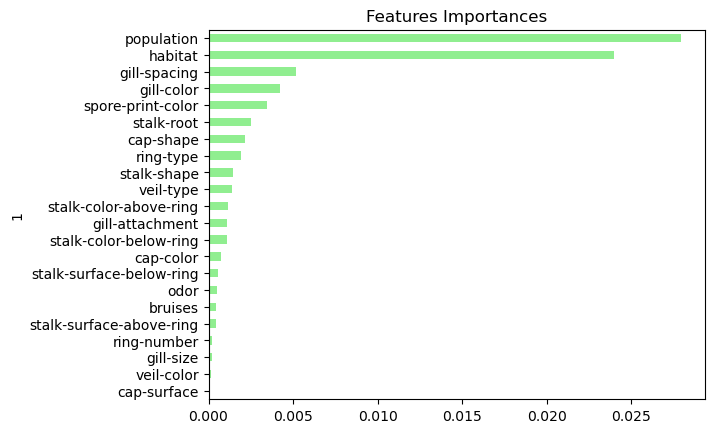

In [21]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Save plot to file (high resolution)
plt.savefig("Figures/Feature_Importance.png", bbox_inches="tight")

In [22]:
import pickle
pickle.dump(rf_model, open('rf_model.pkl','wb'))

# Rerun the Model to optimize number of Features


In [23]:
optimized_df = df.copy()

# Remove bottom 12 features

Choosing Top 10 features to see how the most important features affect the model versus all. Simplifying the model to increase run efficiency on app. 

In [24]:
# Separate the y variable, the labels
y = df['class']

# Separate the X variable, the features
X = df.drop(columns=["class","gill-size","veil-color","cap-surface",'ring-number','stalk-surface-above-ring','bruises',
                    'odor','stalk-surface-below-ring','gill-attachment','stalk-color-above-ring','veil-type','cap-color'])

In [25]:
from sklearn.preprocessing import LabelEncoder
label_model = LabelEncoder()
y_encoded = label_model.fit_transform(y)
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [26]:
X[:5]

,cap-shape,gill-spacing,gill-color,stalk-shape,stalk-root,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,x,c,k,e,e,w,p,k,s,u
1,x,c,k,e,c,w,p,n,n,g
2,b,c,n,e,c,w,p,n,n,m
3,x,c,n,e,e,w,p,k,s,u
4,x,w,k,t,e,w,e,n,a,g


In [27]:
updated_X = pd.get_dummies(X,dtype=float)
updated_X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,gill-spacing_c,gill-spacing_w,gill-color_b,gill-color_e,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
values , counts = np.unique(y_encoded, return_counts=True)
np.asarray((values, counts)).T

array([[   0, 4208],
       [   1, 3916]], dtype=int64)

In [29]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(updated_X,y_encoded, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Create a random forest classifier
rf_model_updated = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model_updated = rf_model_updated.fit(X_train_scaled, y_train)


In [31]:
# Making predictions using the testing data
predictions = rf_model_updated.predict(X_test_scaled)

In [32]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [33]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1039,9
Actual 1,2,981


Accuracy Score : 0.9945839487936977
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1048
           1       0.99      1.00      0.99       983

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [34]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model_updated.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model_updated.feature_importances_, X.columns), reverse=True)

[(0.08531426582356898, 'population'),
 (0.02688172923895071, 'spore-print-color'),
 (0.026310154997077066, 'ring-type'),
 (0.002977735622285812, 'gill-color'),
 (0.0028228028472933164, 'stalk-root'),
 (0.0027148016197862273, 'cap-shape'),
 (0.0026107864013220393, 'stalk-color-below-ring'),
 (0.0022804220782922046, 'habitat'),
 (0.00098928034379636, 'stalk-shape'),
 (0.0001370776468871547, 'gill-spacing')]

In [35]:
pie_df = pd.DataFrame(sorted(zip(rf_model_updated.feature_importances_, X.columns), reverse=True))
pie_df

,0,1
0,0.085314,population
1,0.026882,spore-print-color
2,0.026310,ring-type
3,0.002978,gill-color
4,0.002823,stalk-root
5,0.002715,cap-shape
6,0.002611,stalk-color-below-ring
7,0.002280,habitat
8,0.000989,stalk-shape
9,0.000137,gill-spacing


In [36]:
pie_graph = pie_df[0:10]
pie_graph

,0,1
0,0.085314,population
1,0.026882,spore-print-color
2,0.026310,ring-type
3,0.002978,gill-color
4,0.002823,stalk-root
5,0.002715,cap-shape
6,0.002611,stalk-color-below-ring
7,0.002280,habitat
8,0.000989,stalk-shape
9,0.000137,gill-spacing


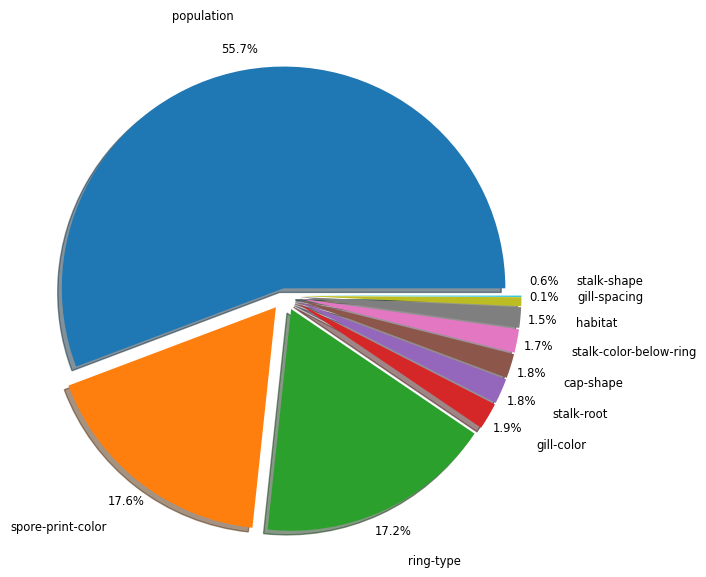

In [37]:
# Visualize the features by proportion
labeler = pie_graph[1]
sizes = pie_graph[0]

explode = (0.05, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1)

fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(sizes, labels=labeler, autopct='%1.1f%%', explode = explode, textprops={'size': 'smaller'},
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.1}, labeldistance=1.25, pctdistance=1.10, radius=1.5)

# Move a label
texts[8]._y =+.10

#move a percentage
autotexts[8]._y=+.10

# Save plot to file (high resolution)
plt.savefig("Figures/Top_10_Features_Pie.png",bbox_inches="tight")

#Visualization of the Proportion of Top 10 Features

The Top 10 Features show an overwhelming significance in population, spore-print-color, and ring-type as the highest indicators of a mushroom's deadliness. These top features are optimized in determining the edibility of mushrooms in the model. 

In [38]:
pickle.dump(rf_model_updated, open('rf_model_optimized.pkl','wb'))